# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import math

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [ ]:
train = pd.read_csv('train.csv', sep = ';')

In [ ]:
train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0


In [ ]:
train.shape

(6000, 13)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [ ]:
train.describe()

,year,selling_price,km_driven,seats
count,6000.000000,6.000000e+03,6.000000e+03,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,14.000000


# Data Preprocessing on Train Dataset

## Handling Missing Values

In [ ]:
train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

In [ ]:
for i in train.columns:
  missing_data = train[i].isna().sum()
  percent = missing_data / len(train) * 100
  print(f'Column {i} has \t {missing_data} missing data, make up {percent} %')

Column name has 	 0 missing data, make up 0.0 %
Column year has 	 0 missing data, make up 0.0 %
Column selling_price has 	 0 missing data, make up 0.0 %
Column km_driven has 	 0 missing data, make up 0.0 %
Column fuel has 	 0 missing data, make up 0.0 %
Column seller_type has 	 0 missing data, make up 0.0 %
Column transmission has 	 0 missing data, make up 0.0 %
Column owner has 	 0 missing data, make up 0.0 %
Column mileage has 	 159 missing data, make up 2.65 %
Column engine has 	 159 missing data, make up 2.65 %
Column max_power has 	 154 missing data, make up 2.566666666666667 %
Column torque has 	 160 missing data, make up 2.666666666666667 %
Column seats has 	 159 missing data, make up 2.65 %


In [ ]:
unique = list(map(lambda x: len(train[x].unique()), list(train)))
print('Unique counts in each column:')
dict(zip(list(train),unique))

Unique counts in each column:


{'name': 1801,
 'year': 28,
 'selling_price': 588,
 'km_driven': 760,
 'fuel': 4,
 'seller_type': 3,
 'transmission': 2,
 'owner': 5,
 'mileage': 372,
 'engine': 119,
 'max_power': 304,
 'torque': 414,
 'seats': 10}

Because milleage has 2 different units: km/kg and kmpl (kilometers per litre). Then we have to convert 'mileage' to the same unit - kmpl

In [ ]:
Convert_mileage = []
for i in train['mileage']:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Convert_mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        Convert_mileage.append(float(i))
    else:
        Convert_mileage.append(0.0)

In [ ]:
train['mileage'] = Convert_mileage

In [ ]:
train['mileage'].replace(0.0,np.nan,inplace=True)

In [ ]:
#Because each car is produced by a specific company but each car has different versions. So, we take only the brand of the car.
train['brand'] = train['name'].map(lambda x : x.split(' ')[0])

train['mileage'] = train['mileage'].astype(float)

train['engine'] = train['engine'].str.split().str[0]
train['engine'] = train['engine'].astype(float)

train['max_power'] = train['max_power'].str.split().str[0]
train['max_power'] = train['max_power'].str.replace('null', '0.0')
train['max_power'] = pd.to_numeric(train['max_power'], errors='coerce')
train['max_power'].replace(0.0,np.nan,inplace=True)

train['torque'] = train['torque'].fillna('0')

train['seats'] = train['seats'].astype(float)

In [ ]:
X = ['mileage','engine', 'max_power', 'seats']
train[X]

,mileage,engine,max_power,seats
0,21.50,1497.0,108.50,5.0
1,21.19,1396.0,88.76,5.0
2,12.55,2982.0,168.50,7.0
3,17.01,1591.0,121.30,5.0
4,18.00,1969.0,190.00,5.0
...,...,...,...,...
5995,19.00,998.0,66.10,5.0
5996,37.24,998.0,58.16,5.0
5997,20.30,1199.0,84.00,5.0
5998,15.96,2523.0,63.00,9.0


Use Sklearn's SimpleImputer class to replace the missing value with the mean of the column

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train[X].values) 

train[X] = imputer.transform(train[X].values)

In [ ]:
train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0,Tata
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0,Hyundai


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        6000 non-null   float64
 9   engine         6000 non-null   float64
 10  max_power      6000 non-null   float64
 11  torque         6000 non-null   object 
 12  seats          6000 non-null   float64
 13  brand          6000 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 656.4+ KB


In [ ]:
train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000
mean,2013.814833,6.387764e+05,6.997216e+04,19.532548,1464.356959,91.663609,5.429550
std,4.026733,8.066632e+05,5.188961e+04,4.114325,501.537569,35.416148,0.964036
min,1983.000000,3.000000e+04,1.000000e+03,9.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.532548,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,46.816000,3604.000000,400.000000,14.000000


## Duplicate

In [ ]:
train.loc[train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
70,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.4,620Nm@ 2000-2500rpm,4.0,BMW
90,Maruti Baleno Alpha 1.3,2018,740000,38817,Diesel,Dealer,Manual,First Owner,27.39,1248.0,74.0,190Nm@ 2000rpm,5.0,Maruti
98,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.5,153Nm@ 3800rpm,5.0,Skoda
111,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177.0,430Nm@ 1750-2500rpm,5.0,Jaguar
123,Maruti Baleno Alpha 1.3,2018,740000,38817,Diesel,Dealer,Manual,First Owner,27.39,1248.0,74.0,190Nm@ 2000rpm,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.00,1197.0,81.8,113Nm@ 4200rpm,5.0,Maruti
5984,Honda Jazz VX,2016,550000,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.20,1199.0,88.7,110Nm@ 4800rpm,5.0,Honda
5985,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.00,1197.0,81.8,113Nm@ 4200rpm,5.0,Maruti
5988,Tata Indigo eCS LX BSIV,2012,246000,35000,Diesel,Individual,Manual,Second Owner,23.03,1396.0,69.0,140Nm@ 1800-3000rpm,5.0,Tata


In [ ]:
train = train.drop_duplicates()

In [ ]:
train.shape

(5244, 14)

## Ouliers

In [ ]:
def fences(df, variable):    
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_outer_fence = Q1 - 3*IQR
    upper_outer_fence = Q3 + 3*IQR
    return lower_outer_fence, upper_outer_fence

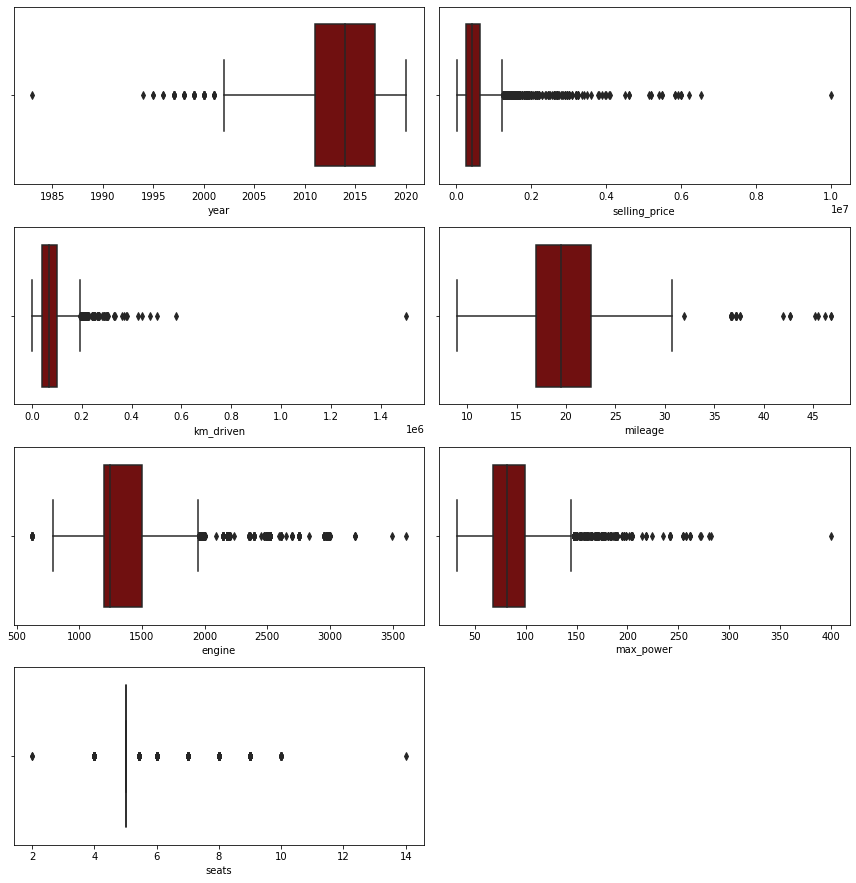

In [ ]:
numeric_columns = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(12,15))

for i, variable in enumerate(numeric_columns):
  plt.subplot(5,2,i+1)
  sns.boxplot(x=train[variable], color='Maroon')
  plt.tight_layout()

In [ ]:
from scipy.stats.mstats import winsorize

train = train[train['year'] >= 1995]
train = train[train['selling_price'] < (0.6*1e7)]

lower_outer_fence, upper_outer_fence = fences(train, 'km_driven')
train['km_driven'] = winsorize(train['km_driven'].values, limits = [0, 0.01])

lower_outer_fence, upper_outer_fence = fences(train, 'mileage')
train['mileage'] = winsorize(train['mileage'].values, limits = [0, 0.01])

lower_outer_fence, upper_outer_fence = fences(train, 'engine')
train['engine'] = winsorize(train['engine'].values, limits = [0, 0.01])

lower_outer_fence, upper_outer_fence = fences(train, 'max_power')
train['max_power'] = winsorize(train['max_power'].values, limits = [0, 0.01])

train = train[train['seats'].between(4,10)]

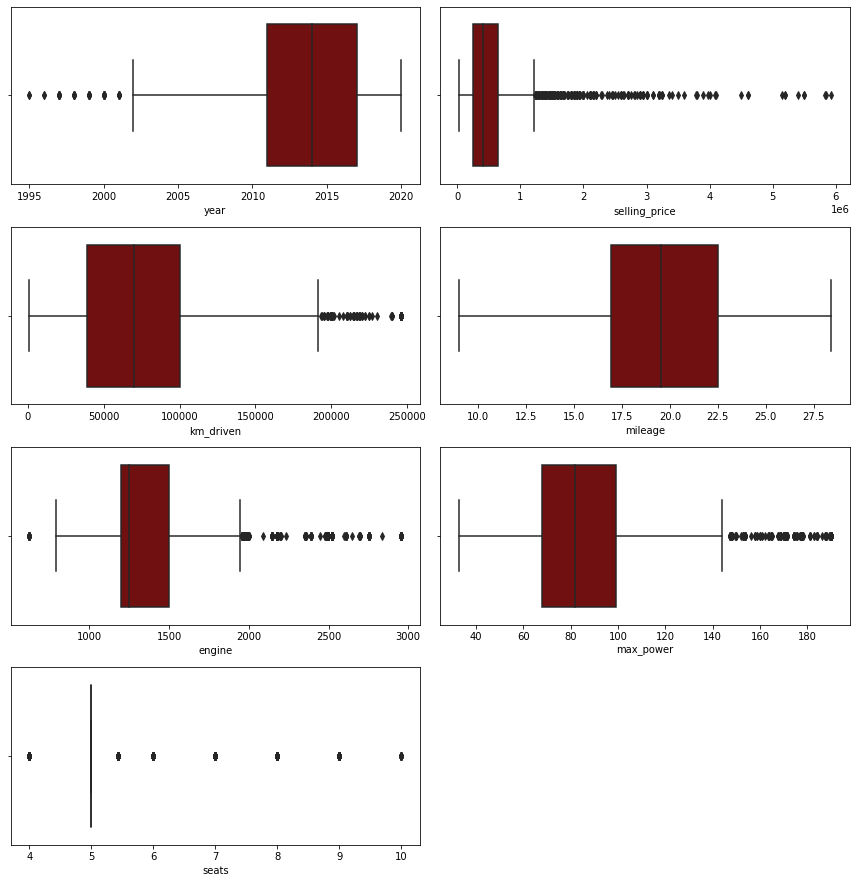

In [ ]:
plt.figure(figsize=(12,15))

for i, variable in enumerate(numeric_columns):
  plt.subplot(5,2,i+1)
  sns.boxplot(x=train[variable], color='Maroon')
  plt.tight_layout()

Most of data features still have outlier but milleage are processed quite pretty well. We can see selling_price still have pretty much outlier.

## EDA

### Correlation Heatmap

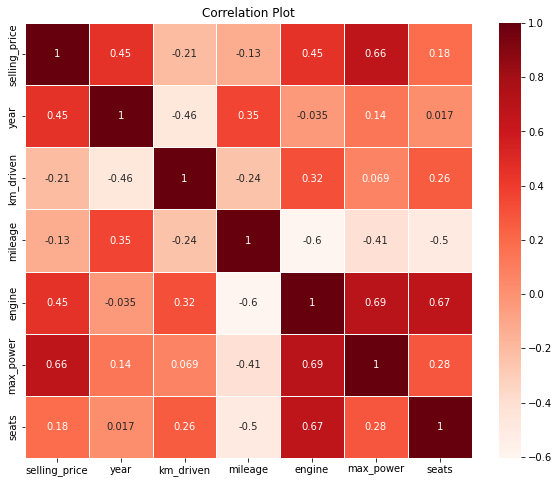

In [ ]:
cols = ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(10,8))
sns.heatmap(train[cols].corr(), linewidths=0.5, cmap="Reds", annot=True);
plt.title("Correlation Plot")
plt.show()

- Seat doesn't seem to influence target variable.
- Km_driven and mileage negatively affects selling_price which could be result of caustion.
- Year, engine and max_power have strong correlation with taget because higher engine capacity imply higher power.
=> There exists a multicolinearity between Engine capacity and power.

### Numerical data

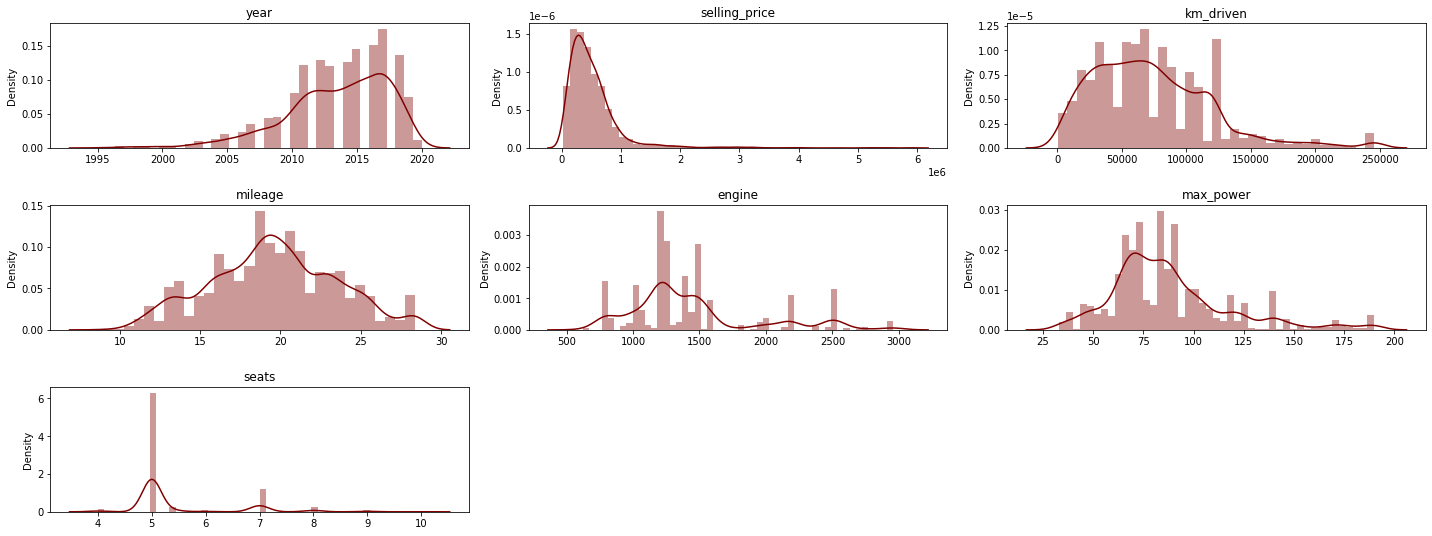

In [ ]:
numeric_columns = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
  plt.subplot(10,3,i+1)
  sns.distplot(x=train[variable], color='Maroon')
  plt.tight_layout()
  plt.title(variable)

Selling price data is positively right skew.

Except for 'year' - left skewed and 'mileage'- quite normal distribution. Most of data are not normal distribution

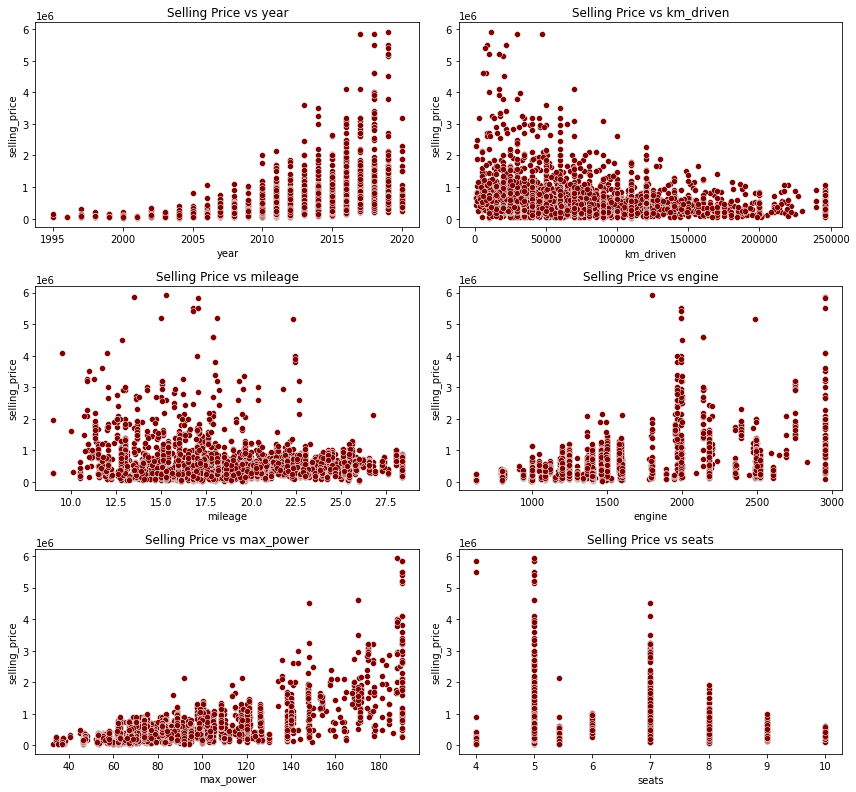

In [ ]:
columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power','seats']

plt.figure(figsize=(12,18))

for i, variable in enumerate(columns):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=train[variable],y=train['selling_price'],color='Maroon')
  plt.title('Selling Price vs '+ variable)
  plt.tight_layout()
     

After handeling with outlier, these plot shows: there still exists many unnormal points in each data features.

This indicates that the selling price is vulnerable especially with some feature such as : engine, max_power, milleage

There strong connection between selling price with year and km_Driven which are easily known as considerable factors affecting the customer buying decision.

### Categorical data

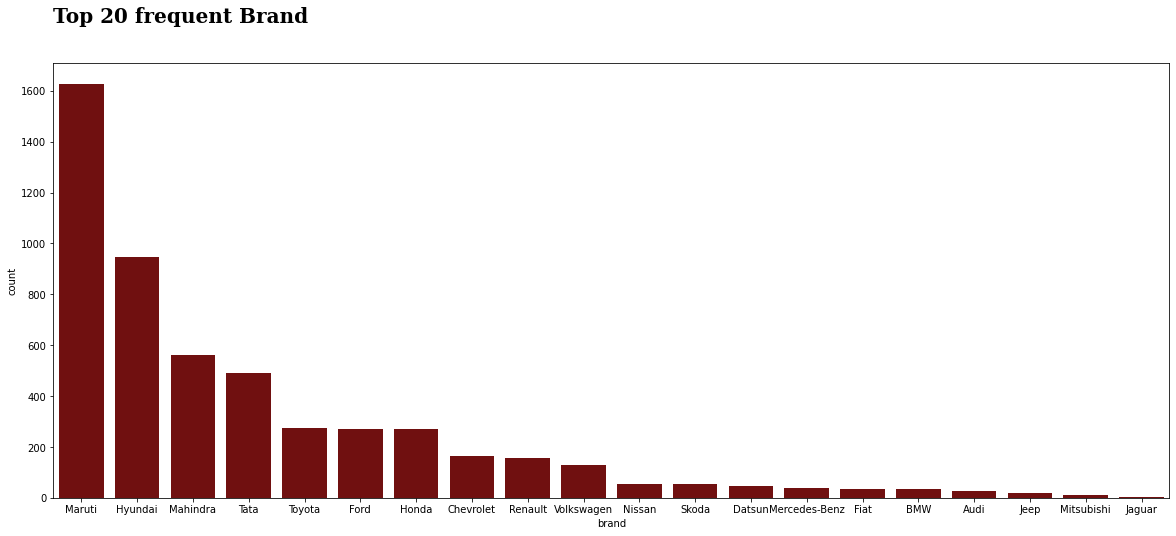

In [ ]:
fig = plt.figure(figsize = (20,8))

sns.countplot(data = train, x = 'brand',order = train['brand'].value_counts().index[0:20], color='Maroon')

fig.text(0.125, 0.95, 'Top 20 frequent Brand', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

There are many car brand sold which ranges from normal to luxury brand. 

Car brands are most prefered include: Maruti, Huyndai, Mahindran,Tata...

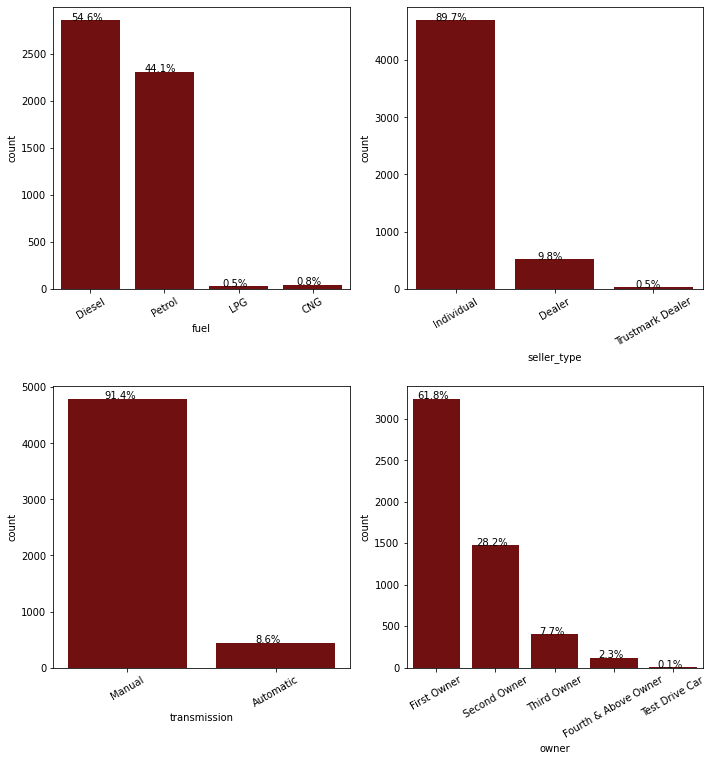

In [ ]:
catecolumns=['fuel', 'seller_type','transmission', 'owner']

plt.figure(figsize=(10,20))

for i, variable in enumerate(catecolumns):
        plt.subplot(4,2,i+1)    
        ax=sns.countplot(x=train[variable], data=train, color='Maroon')
        for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height()/len(train[variable]))
                x = p.get_x() + p.get_width() / 2 - 0.05
                y = p.get_y() + p.get_height()
                plt.annotate(percentage, (x, y),ha='center')
        plt.xticks(rotation=30)
        plt.tight_layout()

## Skewed features

In [ ]:
features = ['km_driven','selling_price','max_power','mileage','engine']

skewness=[]
for i in features:
    skewness.append(train[i].skew())
pd.DataFrame(data=skewness,index=features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
selling_price,4.384637
max_power,1.215486
engine,1.187735
km_driven,1.059592
mileage,0.036474


## Encode

In [ ]:
current = 2021
train['num_year'] = current - train['year']
train['owner'].replace({'First Owner': 1, 'Second Owner': 2, "Third Owner": 3,"Fourth & Above Owner":4, 'Test Drive Car': 5}, inplace=True) 

In [ ]:
Fuel = pd.get_dummies(train['fuel'], drop_first=True)
Seller_type = pd.get_dummies(train['seller_type'], drop_first=True)
Transmission = pd.get_dummies(train['transmission'], drop_first=True)

In [ ]:
luxury_br = ['Volvo', 'BMW', 'Jargua', 'Audi', 'Mercedes-Benz', 'Lexus', 'Land'] 
train['n_brand'] = train['brand'].apply(lambda x: 'Luxury' if x in luxury_br else 'Normal')

In [ ]:
train['n_brand'].value_counts()

Normal    5129
Luxury     104
Name: n_brand, dtype: int64

In [ ]:
Brand = pd.get_dummies(train['n_brand'], drop_first=True)
Brand

,Normal
0,1
1,1
2,1
3,1
4,0
...,...
5995,1
5996,1
5997,1
5998,1


# Feature Selection

In [ ]:
data = train.copy()
data.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,num_year,n_brand
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,1,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0,Tata,3,Normal
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,1,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0,Hyundai,3,Normal
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,2,12.55,2956.0,168.50,360Nm@ 1400-3200rpm,7.0,Toyota,6,Normal


In [ ]:
train.drop(columns={'name', 'year', 'fuel', 'seller_type', 'transmission', 'torque',
                    'brand', 'n_brand'}, inplace=True)

train1 = pd.concat([train, Fuel, Transmission, Brand, Seller_type], axis=1)
train1.head(3)

,selling_price,km_driven,owner,mileage,engine,max_power,seats,num_year,Diesel,LPG,Petrol,Manual,Normal,Individual,Trustmark Dealer
0,850000,9500,1,21.50,1497.0,108.50,5.0,3,1,0,0,1,1,1,0
1,750000,30000,1,21.19,1396.0,88.76,5.0,3,1,0,0,1,1,1,0
2,1500000,80000,2,12.55,2956.0,168.50,7.0,6,1,0,0,0,1,1,0


In [ ]:
train1.loc[train1.duplicated()]

,selling_price,km_driven,owner,mileage,engine,max_power,seats,num_year,Diesel,LPG,Petrol,Manual,Normal,Individual,Trustmark Dealer
2098,450000,120000,1,15.96,2523.0,62.1,7.0,9,1,0,0,1,1,1,0
2191,750000,60000,1,18.49,1493.0,100.0,7.0,4,1,0,0,1,1,1,0
2532,470000,23700,1,20.40,1197.0,81.8,5.0,5,0,0,1,1,1,1,0
4349,300000,35000,1,23.01,999.0,67.0,5.0,4,0,0,1,1,1,1,0
4488,240000,50000,1,22.74,796.0,47.3,5.0,5,0,0,1,1,1,1,0
5062,800000,70000,1,15.40,1997.0,120.0,7.0,6,1,0,0,1,1,1,0
5137,220000,80000,2,16.20,1493.0,110.0,5.0,11,1,0,0,1,1,1,0
5551,310000,35000,1,24.70,796.0,47.3,5.0,4,0,0,1,1,1,1,0
5563,850000,120000,1,15.10,2179.0,140.0,7.0,7,1,0,0,1,1,1,0


In [ ]:
train1 = train1.drop_duplicates()

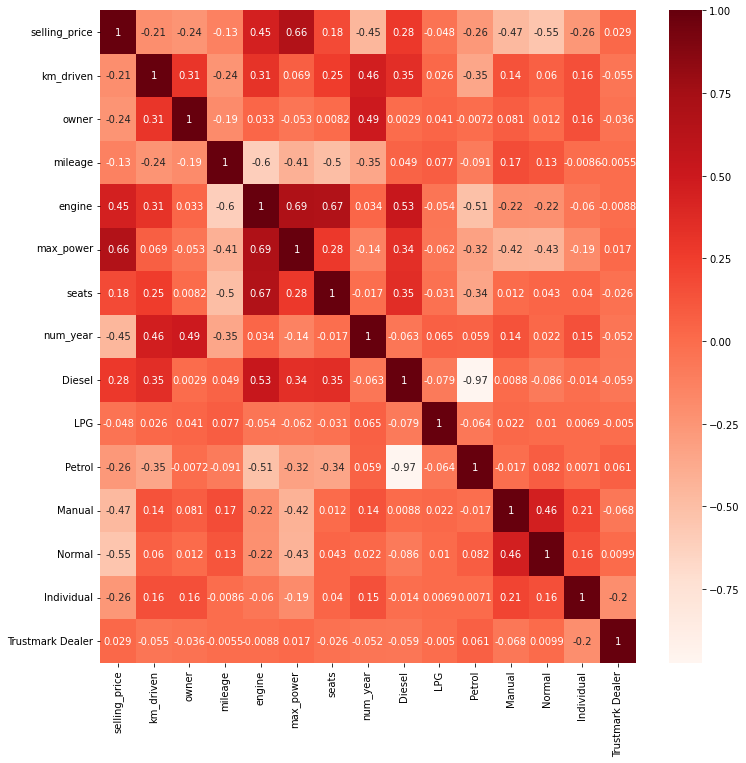

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train1.corr(), cmap='Reds', annot=True)
plt.show()

# Data Preprocessing on file Test

## Load Dataset

In [ ]:
test = pd.read_csv('test.csv', sep =';')

In [ ]:
test.head(2)

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0


In [ ]:
test.drop('Id', axis=1, inplace=True)

In [ ]:
test.shape

(2128, 12)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2128 non-null   object 
 1   year          2128 non-null   int64  
 2   km_driven     2128 non-null   int64  
 3   fuel          2128 non-null   object 
 4   seller_type   2128 non-null   object 
 5   transmission  2128 non-null   object 
 6   owner         2128 non-null   object 
 7   mileage       2066 non-null   object 
 8   engine        2066 non-null   object 
 9   max_power     2067 non-null   object 
 10  torque        2066 non-null   object 
 11  seats         2066 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 199.6+ KB


## Handling Missing Values

In [ ]:
test.isna().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         62
engine          62
max_power       61
torque          62
seats           62
dtype: int64

In [ ]:
Convertmileage = []
for i in test['mileage']:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Convertmileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        Convertmileage.append(float(i))
    else:
        Convertmileage.append(0.0)

In [ ]:
test['mileage'] = Convertmileage

In [ ]:
test['mileage'].replace(0.0,np.nan,inplace=True)

In [ ]:
test['brand'] = test['name'].map(lambda x : x.split(' ')[0])

test['mileage'] = test['mileage'].astype(float)

test['engine'] = test['engine'].str.split().str[0]
test['engine'] = test['engine'].astype(float)

test['max_power'] = test['max_power'].str.split().str[0]
test['max_power'] = test['max_power'].str.replace('null', '0.0')
test['max_power'] = pd.to_numeric(test['max_power'], errors='coerce')
test['max_power'].replace(0.0,np.nan,inplace=True)

test['torque'] = test['torque'].fillna('0')

test['seats'] = test['seats'].astype(float)

In [ ]:
Y = ['mileage','engine', 'max_power', 'seats']
test[Y]

,mileage,engine,max_power,seats
0,14.30,1598.0,103.50,5.0
1,17.80,1497.0,117.30,5.0
2,19.10,1197.0,82.00,5.0
3,12.05,2179.0,120.00,7.0
4,21.70,1498.0,98.96,5.0
...,...,...,...,...
2123,20.70,1197.0,81.86,5.0
2124,28.40,1248.0,74.02,5.0
2125,17.88,1396.0,52.80,5.0
2126,19.67,1582.0,126.20,5.0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(test[Y].values) 

test[Y] = imputer.transform(test[Y].values)

In [ ]:
test.isna().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
seats           0
brand           0
dtype: int64

In [ ]:
test.describe()

,year,km_driven,mileage,engine,max_power,seats
count,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
mean,2013.773496,6.938912e+04,19.631921,1442.419652,91.371878,5.380445
std,4.094030,6.800549e+04,4.019977,483.804963,34.806294,0.894262
min,1991.000000,1.000000e+00,9.000000,624.000000,32.800000,4.000000
25%,2011.000000,3.327825e+04,17.000000,1197.000000,69.000000,5.000000
50%,2015.000000,6.000000e+04,19.631921,1248.000000,83.140000,5.000000
75%,2017.000000,9.600000e+04,22.320000,1498.000000,100.600000,5.000000
max,2020.000000,2.360457e+06,46.816000,3604.000000,280.000000,10.000000


## Encode

In [ ]:
current = 2021
test['num_year'] = current - test['year']
test['owner'].replace({'First Owner': 1, 'Second Owner': 2, "Third Owner": 3,
                       "Fourth & Above Owner":4, 'Test Drive Car': 5}, inplace=True) 

In [ ]:
Fuelt = pd.get_dummies(test['fuel'], drop_first=True)
Seller_typet = pd.get_dummies(test['seller_type'], drop_first=True)
Transmissiont = pd.get_dummies(test['transmission'], drop_first=True)

In [ ]:
luxury_br = ['Volvo', 'BMW', 'Jargua', 'Audi', 'Mercedes-Benz', 'Lexus', 'Land'] 
test['n_brand'] = test['brand'].apply(lambda x: 'Luxury' if x in luxury_br else 'Normal')

In [ ]:
Brandt = pd.get_dummies(test['n_brand'], drop_first=True)
Brandt

,Normal
0,1
1,1
2,1
3,1
4,1
...,...
2123,1
2124,1
2125,1
2126,1


## Feature

In [ ]:
data1 = test.copy()

In [ ]:
test.drop(columns={'name', 'year', 'fuel', 'seller_type', 'transmission', 'torque',
                    'brand', 'n_brand'}, inplace=True)

test1 = pd.concat([test, Fuelt, Transmissiont, Brandt, Seller_typet], axis=1)
test1.head(3)

,km_driven,owner,mileage,engine,max_power,seats,num_year,Diesel,LPG,Petrol,Manual,Normal,Individual,Trustmark Dealer
0,11000,1,14.3,1598.0,103.5,5.0,5,0,0,1,0,1,0,0
1,35000,1,17.8,1497.0,117.3,5.0,4,0,0,1,1,1,1,0
2,80000,1,19.1,1197.0,82.0,5.0,7,0,0,1,1,1,1,0


# Build Model

In [ ]:
from sklearn.model_selection import train_test_split

X = train1.drop(columns='selling_price')
y = train1['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scalling

In [ ]:
# IN CASE FOR SCALING 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.6961959931375706
Accuracy on Testing set:  0.7125717375384026


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error      :  157254.55282508585
Mean Squared  Error      :  82295945095.5366
Root Mean Squared  Error :  286872.69841436046
R Squared Error          :  0.7125717375384026


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)

print("Accuracy on Traing set: ",reg_rf.score(X_train,y_train))
print("Accuracy on Testing set: ",reg_rf.score(X_test,y_test))

Accuracy on Traing set:  0.9848721693746803
Accuracy on Testing set:  0.8852863649513493


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error      :  85428.53658519786
Mean Squared  Error      :  32844602443.83416
Root Mean Squared  Error :  181230.79882799767
R Squared Error          :  0.8852863649513493


In [ ]:
predicted = reg_rf.predict(test1)
Sampleee = pd.DataFrame(data={'Id': np.arange(1, test1.shape[0]+1), 'Predicted': predicted})

Sampleee.head()

,Id,Predicted
0,1,630160.00
1,2,808475.00
2,3,426249.93
3,4,587890.00
4,5,587125.00


## XGBRegressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred= xgb.predict(X_test)

[21:22:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("Accuracy on Traing set: ",xgb.score(X_train,y_train))
print("Accuracy on Testing set: ",xgb.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set:  0.9299206103437426
Accuracy on Testing set:  0.8904440756354977
		Error Table
Mean Absolute Error      :  94863.88400867225
Mean Squared  Error      :  31367855962.30801
Root Mean Squared  Error :  177109.7285930618
R Squared Error          :  0.8904440756354977


## Gradient Boasting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gredR = GradientBoostingRegressor(max_depth = 2, n_estimators = 4, learning_rate = 1.0)
gredR.fit(X_train, y_train)
y_pred = gredR.predict(X_test)

In [ ]:
print("Accuracy on Traing set: ",gredR.score(X_train,y_train))
print("Accuracy on Testing set: ",gredR.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set:  0.7622778319571558
Accuracy on Testing set:  0.7406173985036184
		Error Table
Mean Absolute Error      :  152599.9582108682
Mean Squared  Error      :  74265961700.0457
Root Mean Squared  Error :  272517.8190505085
R Squared Error          :  0.7406173985036184


## Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
print("Accuracy on Traing set: ",dt.score(X_train,y_train))
print("Accuracy on Testing set: ",dt.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set:  0.9992387366843831
Accuracy on Testing set:  0.8127462593800203
		Error Table
Mean Absolute Error      :  110966.4692185008
Mean Squared  Error      :  53614155494.03264
Root Mean Squared  Error :  231547.30724850297
R Squared Error          :  0.8127462593800203
